In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np

## 1、将输入转化成TFRecord格式并保存

In [6]:
#定义函数转化变量类型
#生成整数型的属性
def _int64_feature(value):
    return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))

#生成字符串型的属性
def _bytes_feature(value):
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

#读取mnist数据集
mnist=input_data.read_data_sets("/path/to/MNIST_data/",one_hot=True)
images=mnist.train.images

#训练数据对应的正确答案，可以作为一个属性保存在TFRecord中。
labels=mnist.train.labels

#训练数据的图像分辨率，可以作为Example中的一个属性
pixels=images.shape[1]
num_examples=mnist.train.num_examples

#输出TFRecord文件的地址
filename="/path/Tensorflow/7/output.tfrecords"
#创建一个writer来写TFRecord文件
writer=tf.python_io.TFRecordWriter(filename)

for index in range(num_examples):
    #将图像矩阵转化成一个字符串
    image_raw=images[index].tostring()
    
    #将一个样例转化为Example Protocol Buffer,并将所有的信息写入这个数据结构。
    example=tf.train.Example(features=tf.train.Features(feature={
        'pixels':_int64_feature(pixels),
        'label':_int64_feature(np.argmax(labels[index])),
        'image_raw':_bytes_feature(image_raw)  
    }))
    #将一个Example写入TFRecord文件
    writer.write(example.SerializeToString())
writer.close()
print("TFRecord文件已保存。")


Extracting /path/to/MNIST_data/train-images-idx3-ubyte.gz
Extracting /path/to/MNIST_data/train-labels-idx1-ubyte.gz
Extracting /path/to/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting /path/to/MNIST_data/t10k-labels-idx1-ubyte.gz
TFRecord文件已保存。


## 2、读取TFRecord文件

In [7]:
#读取文件
import tensorflow as tf
#创建一个reader来读取TFRecord文件中的样例
reader=tf.TFRecordReader()
filename_queue=tf.train.string_input_producer(["/path/Tensorflow/7/output.tfrecords"])
_,serialized_example=reader.read(filename_queue)

#解析读取的样例
features=tf.parse_single_example(serialized_example,\
                                features={
                                    'image_raw':tf.FixedLenFeature([],tf.string),
                                    'pixels':tf.FixedLenFeature([],tf.int64),
                                    'label':tf.FixedLenFeature([],tf.int64)
                                })
images=tf.decode_raw(features['image_raw'],tf.uint8)
labels=tf.cast(features['label'],tf.int32)
pixels=tf.cast(features['pixels'],tf.int32)
with tf.Session() as sess:
    #启动多线程处理输入数据
    coord=tf.train.Coordinator()
    threads=tf.train.start_queue_runners(sess=sess,coord=coord)
    for i in range(10):
        image,label,pixel=sess.run([images,labels,pixels])

INFO:tensorflow:Error reported to Coordinator: <class 'tensorflow.python.framework.errors_impl.CancelledError'>, Enqueue operation was cancelled
	 [[Node: input_producer/input_producer_EnqueueMany = QueueEnqueueManyV2[Tcomponents=[DT_STRING], timeout_ms=-1, _device="/job:localhost/replica:0/task:0/cpu:0"](input_producer, input_producer/RandomShuffle)]]

Caused by op 'input_producer/input_producer_EnqueueMany', defined at:
  File "C:\Users\pujing\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\pujing\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\pujing\Anaconda3\lib\site-packages\ipykernel\__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "C:\Users\pujing\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\pujing\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 474, in start
    ioloop.IOL

## 图像处理

In [1]:
# -*- coding:utf-8 -*-
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

image_raw_data = tf.gfile.FastGFile("/path/Tensorflow/7/cat.jpg",'rb').read()
with tf.Session() as sess:
    img_data = tf.image.decode_jpeg(image_raw_data)
    
    # 输出解码之后的三维矩阵。
    print (img_data.eval())
    #将数据的类型转化为实数方便下面的样例程序对图像进行处理
    img_data=tf.image.convert_image_dtype(img_data,dtype=tf.float32)

    #将表示一张图像的三维矩阵重新按照jpeg格式编码并存入文件中，打开这张图像可以得到
    #和原始图像一样的图像
    #encoded_image=tf.image.encode_jpeg(img_data)
    #with tf.gfile.GFile("/path/Tensorflow/7/cat1.jpg","wb") as f:
        #f.write(encoded_image.eval())
    
    

[[[162 161 140]
  [162 162 138]
  [161 161 137]
  ..., 
  [106 140  46]
  [101 137  47]
  [102 141  52]]

 [[164 162 139]
  [163 161 136]
  [163 161 138]
  ..., 
  [104 138  43]
  [102 139  46]
  [108 138  50]]

 [[165 163 140]
  [165 163 138]
  [163 161 136]
  ..., 
  [104 135  41]
  [102 137  43]
  [108 139  45]]

 ..., 
 [[207 200 181]
  [206 199 180]
  [206 199 180]
  ..., 
  [109  84  53]
  [107  84  53]
  [106  81  50]]

 [[205 200 180]
  [205 200 180]
  [206 199 180]
  ..., 
  [106  83  49]
  [105  82  51]
  [106  81  50]]

 [[205 200 180]
  [205 198 179]
  [205 198 179]
  ..., 
  [108  86  49]
  [105  82  48]
  [104  81  49]]]


## 打印图片

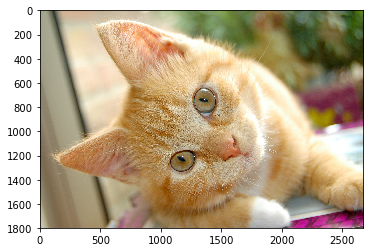

In [2]:
with tf.Session() as sess:
    plt.imshow(img_data.eval())
    plt.show()

## 重新调整图片的大小

Digtial type: <dtype: 'float32'>


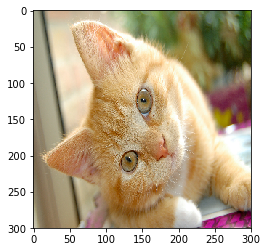

In [23]:
with tf.Session() as sess:
    resized=tf.image.resize_images(img_data,[300,300],method=0)
    print("Digtial type:",resized.dtype)
    cat=np.asarray(resized.eval(),dtype='float32')
    plt.imshow(cat)
    plt.show()

## 剪裁和填充图片

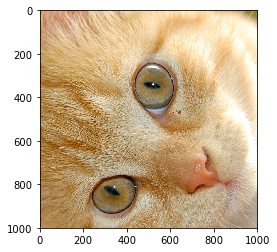

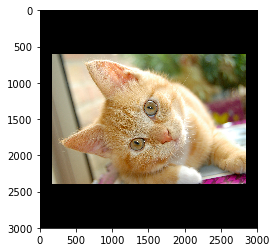

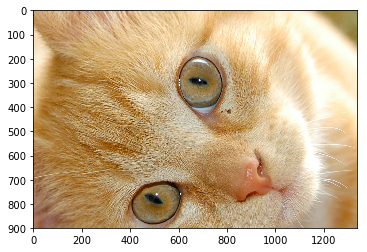

In [29]:
with tf.Session() as sess:
    croped=tf.image.resize_image_with_crop_or_pad(img_data,1000,1000)
    plt.imshow(croped.eval())
    plt.show()
    
    padded=tf.image.resize_image_with_crop_or_pad(img_data,3000,3000)
    plt.imshow(padded.eval())
    plt.show()
    
    cropped=tf.image.central_crop(img_data,0.5)
    plt.imshow(cropped.eval())
    plt.show()

## 翻转图片

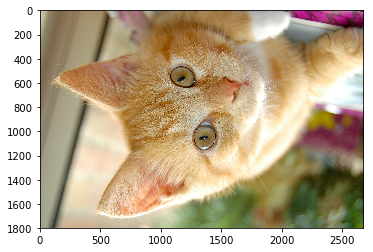

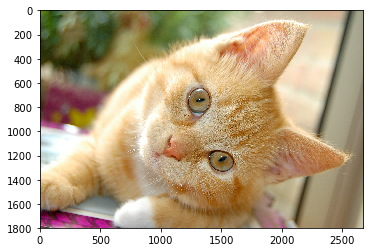

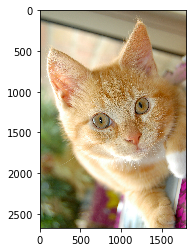

In [34]:
with tf.Session() as sess:
    #上下翻转
    flipped1=tf.image.flip_up_down(img_data)
    plt.imshow(flipped1.eval())
    plt.show()
    
    #左右翻转
    flipped2=tf.image.flip_left_right(img_data)
    plt.imshow(flipped2.eval())
    plt.show()
    
    #对角线翻转
    transposed=tf.image.transpose_image(img_data)
    plt.imshow(transposed.eval())
    plt.show()

## 图片色彩调整

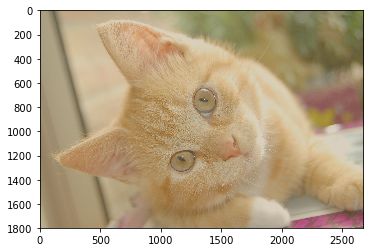

In [51]:
with tf.Session() as sess:
    #建图片的亮度-0.5
    #adjusted=tf.image.adjust_brightness(img_data,-0.5)
    #adjusted=tf.image.adjust_brightness(img_data,0.5)
    
    #随机调整图片的亮度
    #adjusted=tf.image.random_brightness(img_data,max_delta=0.5)
    
    #将图片的对比度-5
    #adjusted=tf.image.adjust_contrast(img_data,-5)
    
    #将图片的对比度加5
    #adjusted=tf.image.adjust_contrast(img_data,5)
    
    # 在[lower, upper]的范围随机调整图的对比度。
    adjusted = tf.image.random_contrast(img_data,0, 1)

    plt.imshow(adjusted.eval())
    plt.show()

## 添加色相和饱和度

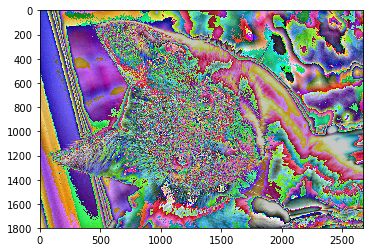

In [67]:
with tf.Session() as sess:
    #adjusted=tf.image.adjust_hue(img_data,0.1)
    #adjusted=tf.image.adjust_hue(img_data,0.3)
    #adjusted=tf.image.adjust_hue(img_data,0.6)
    #adjusted=tf.image.random_hue(img_data,0,0.5)
    
    #adjusted=tf.image.adjust_saturation(img_data,-5)
    #adjusted=tf.image.adjust_saturation(img_data,5)
    #adjusted=tf.image.random_saturation(img_data,0,3)
    # 将代表一张图片的三维矩阵中的数字均值变为0，方差变为1。
    adjusted = tf.image.per_image_standardization(img_data)
    plt.imshow(adjusted.eval())
    plt.show()

## 处理标注框

In [20]:
#将图片缩小一些，这样可视化能够让图标更加清楚
with tf.Session() as sess:
    img_data=tf.image.resize_images(img_data,[180,267],method=0)
    batched=tf.expand_dims(tf.image.convert_image_dtype(img_data,tf.float32),0)
    boxes=tf.constant([[[0.05,0.05,0.9,0.7],[0.35,0.47,0.5,0.56]]])
    result=tf.image.draw_bounding_boxes(batched,boxes)
    encoded_image=tf.image.encode_jpeg(result)
    with tf.gfile.GFile("/path/Tensorflow/7/cat2","wb") as f:
        f.write(encoded_image.eval())

TypeError: Input 'image' of 'EncodeJpeg' Op has type float32 that does not match expected type of uint8.